In [91]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

In [92]:
models = ['Autodock Vina', 'TopologyNet', 'ACNN', 'Brendan', 'PotentialNet', 'KDeep', 'Pafnucy', 'DeepAtom', 'OnionNet', 'RosENet', 'graphDelta', 'AK-Score', 'SE-OnionNet', 'ECIF-GBT', 'DEELIG', 'IGN', 'FAST', 'SMPLIP', 'OctSurf', 'BAPA', 'APMNet', 'GraphBar', 'GATNet', 'GIANT']
errors = [1.61, 1.37, None, None, 1.39, 1.27, 1.42, 1.32, 1.28, 1.24, 1.05, 1.22, 1.59, 1.17, None, 1.22, 1.31, 1.51, 1.45, 1.31, 1.27, 1.44, 1.19, 1.269]
pearson = [0.62, 0.826, 0.727, 0.704, 0.822, 0.82, 0.78, 0.807, 0.816, 0.82, 0.87, 0.827, 0.853, 0.866, 0.889, 0.837, 0.81, 0.77, 0.793, 0.819, 0.815, 0.764, 0.84, 0.814]

models.append('Our Model')
errors.append(1.155)
pearson.append(0.851)


In [101]:
pearson_plot = []

for r, rmse, m in zip(pearson, errors, models):
    if (r is not None and r>0.77 and rmse is not None) or m.startswith('Autodock Vina'):
        pearson_plot.append((r, m))

pearson_plot = sorted(pearson_plot)
pearson_plot

[(0.62, 'Autodock Vina'),
 (0.78, 'Pafnucy'),
 (0.793, 'OctSurf'),
 (0.807, 'DeepAtom'),
 (0.81, 'FAST'),
 (0.814, 'GIANT'),
 (0.815, 'APMNet'),
 (0.816, 'OnionNet'),
 (0.819, 'BAPA'),
 (0.82, 'KDeep'),
 (0.82, 'RosENet'),
 (0.822, 'PotentialNet'),
 (0.826, 'TopologyNet'),
 (0.827, 'AK-Score'),
 (0.837, 'IGN'),
 (0.84, 'GATNet'),
 (0.851, 'Our Model'),
 (0.853, 'SE-OnionNet'),
 (0.866, 'ECIF-GBT'),
 (0.87, 'graphDelta')]

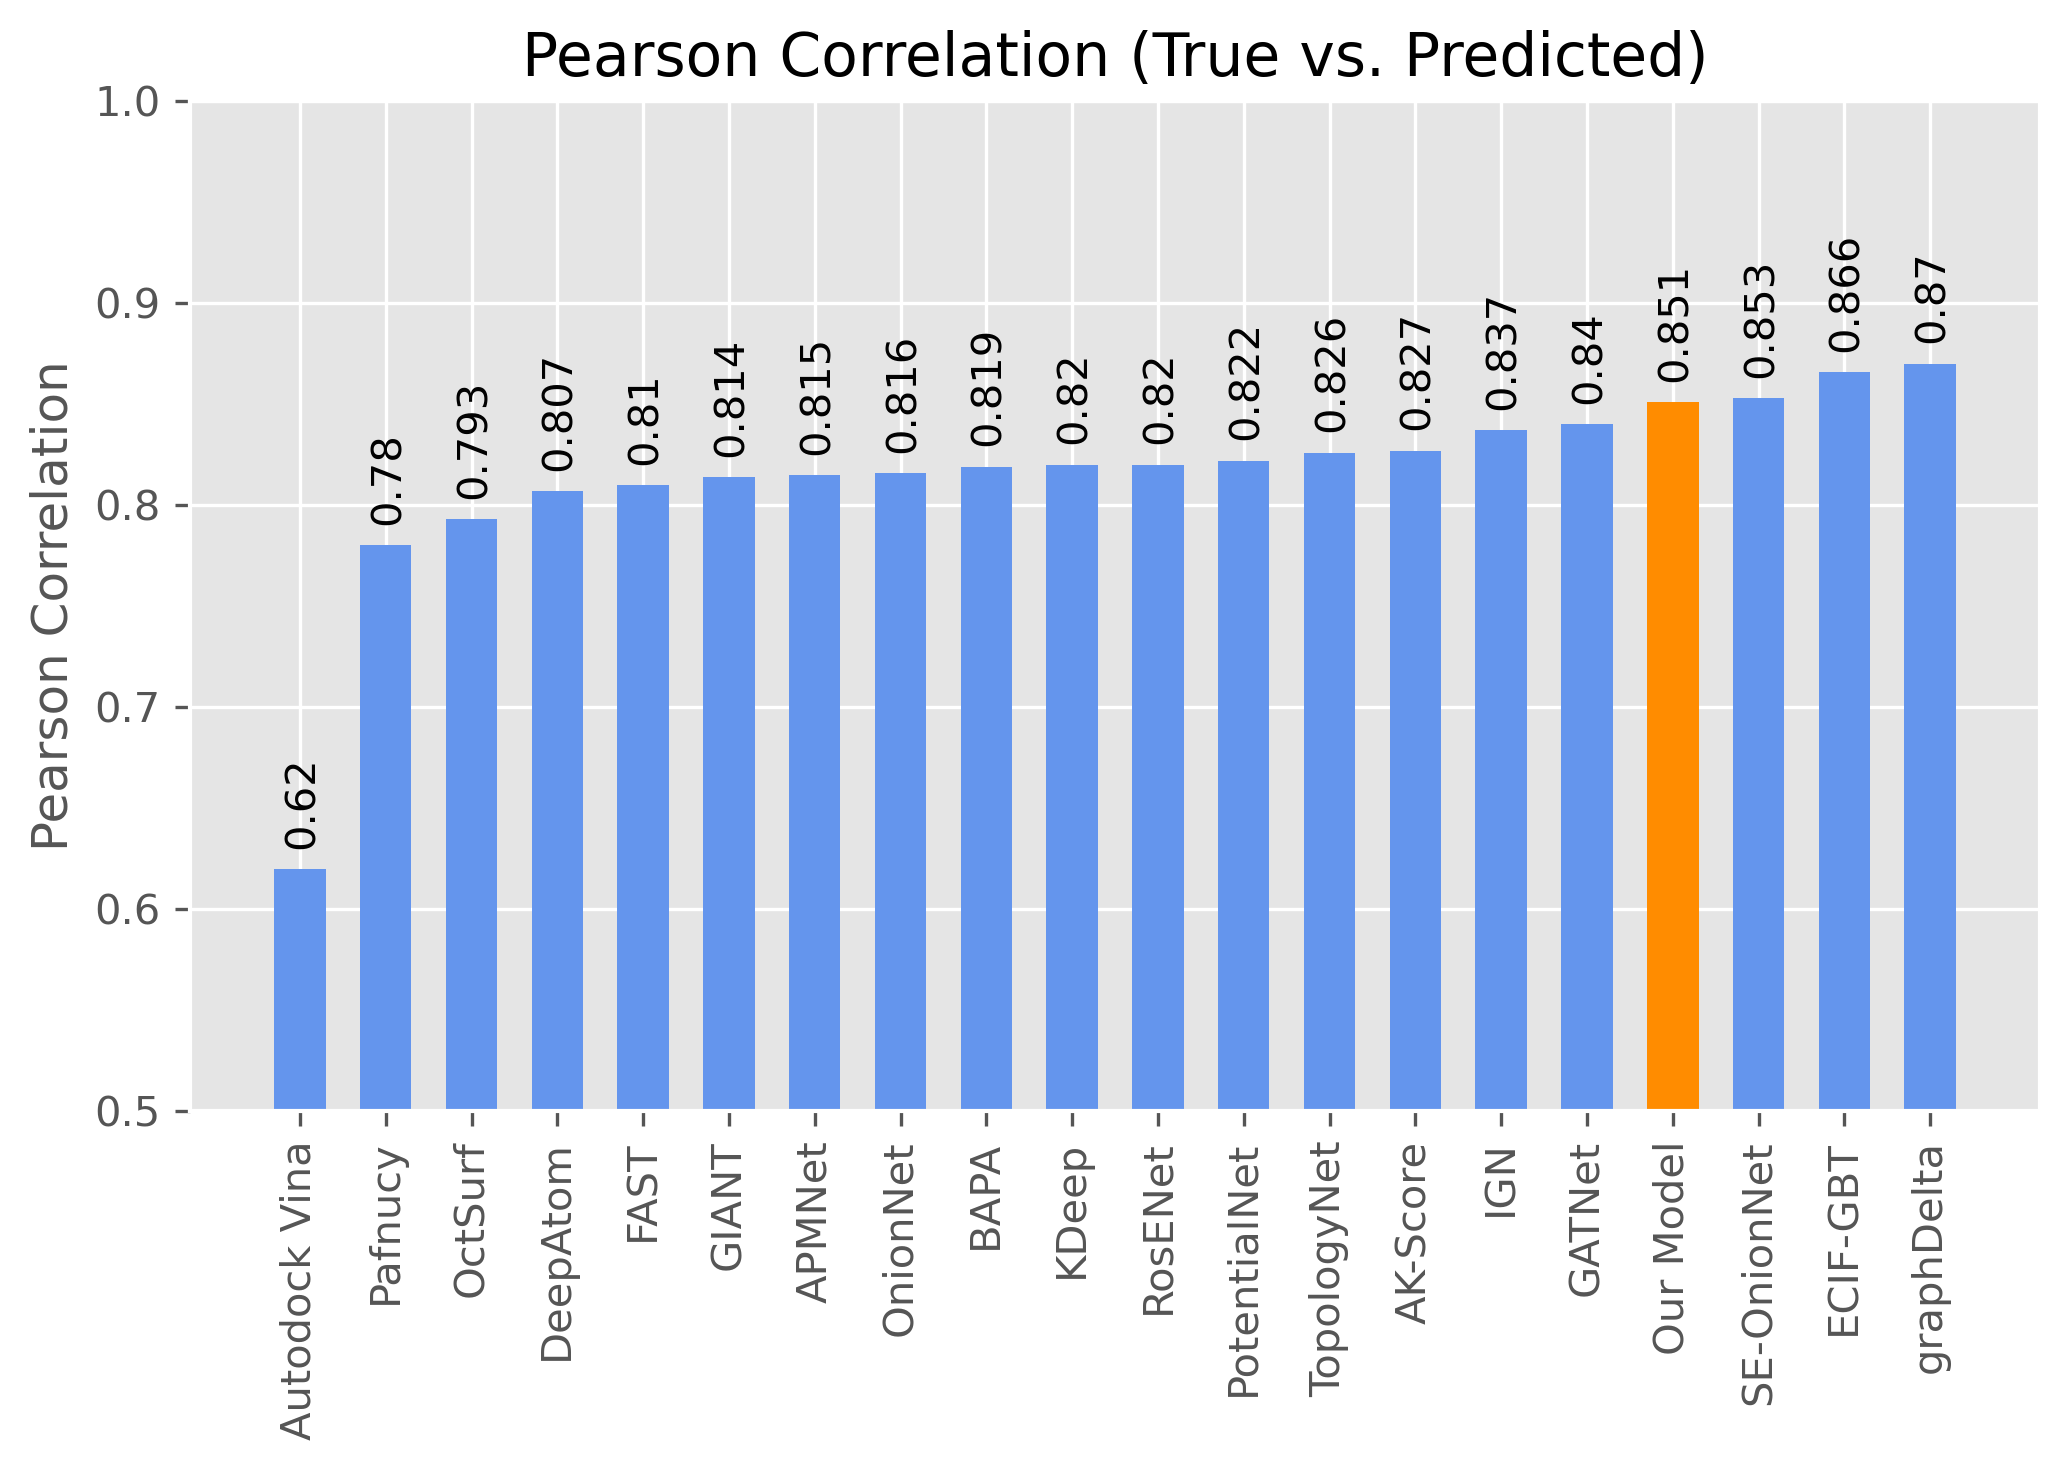

In [102]:
# Splitting the data into two lists
performances, model_names = zip(*pearson_plot)
plt.style.use('ggplot')

# Creating the bar plot with conditional coloring
plt.figure(figsize=(7, 5))
for performance, model_name in zip(performances, model_names):
    if model_name == "Our Model":
        color = 'darkorange'  # You can choose a different color here
    else:
        color = 'cornflowerblue'  # Default color for other bars
    bar = plt.bar(model_name, performance, width=0.6, color=color)

    # Adding the performance value on top of the bars
    plt.text(bar[0].get_x()+ 0.1, performance+0.01, round(performance, 3), 
             verticalalignment='bottom', rotation=90)
    
    # plt.text(model_names.index(model_name), performance+0.01, round(performance, 3), 
    #          verticalalignment='bottom', rotation=90)

# Setting the model names as the x-axis labels vertically
plt.xticks(rotation=90)
plt.ylim(0.5,1)

plt.ylabel('Pearson Correlation')
plt.title('Pearson Correlation (True vs. Predicted)')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

In [103]:
rmse_plot = []

for r, rmse, m in zip(pearson, errors, models):
    if (r is not None and r>0.77 and rmse is not None) or m.startswith('Autodock Vina'):
        rmse_plot.append((rmse, m))

rmse_plot = sorted(rmse_plot, reverse=True)
rmse_plot

[(1.61, 'Autodock Vina'),
 (1.59, 'SE-OnionNet'),
 (1.45, 'OctSurf'),
 (1.42, 'Pafnucy'),
 (1.39, 'PotentialNet'),
 (1.37, 'TopologyNet'),
 (1.32, 'DeepAtom'),
 (1.31, 'FAST'),
 (1.31, 'BAPA'),
 (1.28, 'OnionNet'),
 (1.27, 'KDeep'),
 (1.27, 'APMNet'),
 (1.269, 'GIANT'),
 (1.24, 'RosENet'),
 (1.22, 'IGN'),
 (1.22, 'AK-Score'),
 (1.19, 'GATNet'),
 (1.17, 'ECIF-GBT'),
 (1.155, 'Our Model'),
 (1.05, 'graphDelta')]

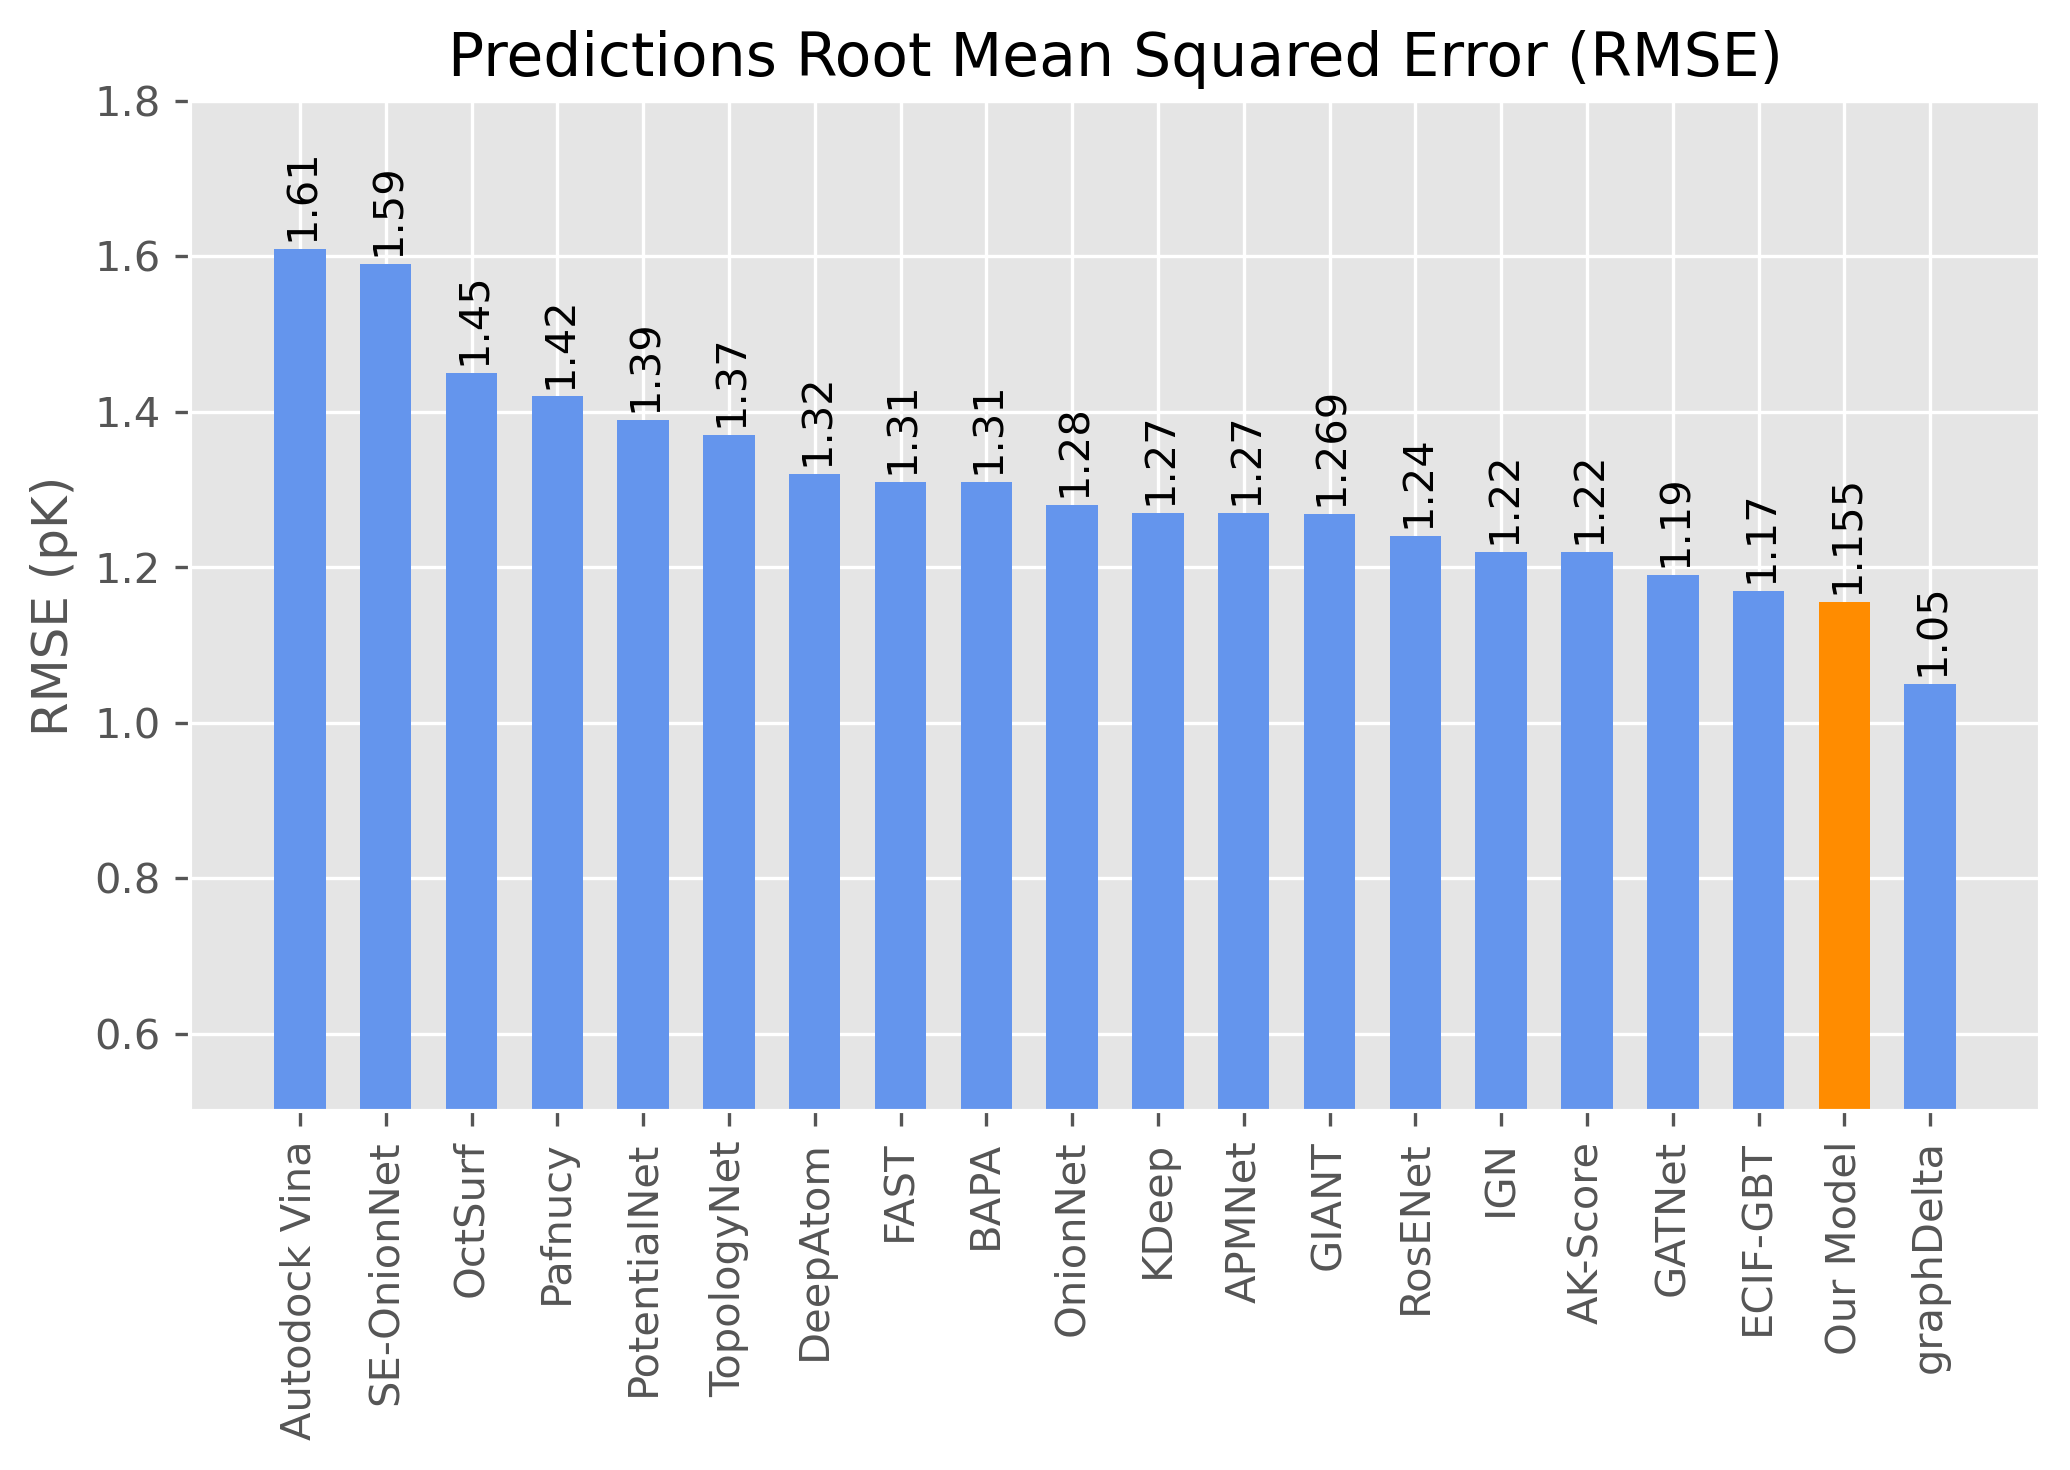

In [104]:
# Splitting the data into two lists
performances, model_names = zip(*rmse_plot)
plt.style.use('ggplot')

# Creating the bar plot with conditional coloring
plt.figure(figsize=(7, 5))
for performance, model_name in zip(performances, model_names):
    if model_name == "Our Model":
        color = 'darkorange'  # You can choose a different color here
    else:
        color = 'cornflowerblue'  # Default color for other bars
    bar = plt.bar(model_name, performance, width=0.6, color=color)

    # Adding the performance value on top of the bars
    plt.text(bar[0].get_x()+ 0.1, performance+0.01, round(performance, 3), 
             verticalalignment='bottom', rotation=90)
    
    # plt.text(model_names.index(model_name), performance+0.01, round(performance, 3), 
    #          verticalalignment='bottom', rotation=90)

# Setting the model names as the x-axis labels vertically
plt.xticks(rotation=90)
plt.ylim(0.5,1.8)

plt.ylabel('RMSE (pK)')
plt.title('Predictions Root Mean Squared Error (RMSE)')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()